## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [8]:
df=pd.read_csv('spamSMS.csv')

In [9]:
df.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [13]:
df.shape

(5574, 2)

We see that there are a total of 5574 records and two columns. 

In [16]:
df.groupby("Class").describe()

input Text                                                            \
           count unique                                                top   
Class                                                                        
ham         4827   4518                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

            
      freq  
Class       
ham     30  
spam     4

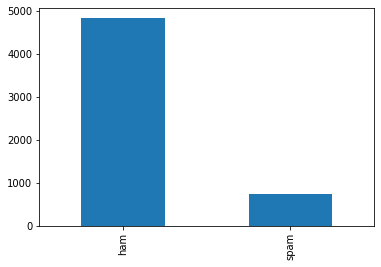

In [18]:
df.Class.value_counts().plot.bar();

Also observed that number of legitimate messages(ham) are much more than spam messages.

In [20]:
df['spam'] = df['Class'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head()

,Class,input Text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [22]:
df['length'] = df['input Text'].apply(len)

In [23]:
df.head()

,Class,input Text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


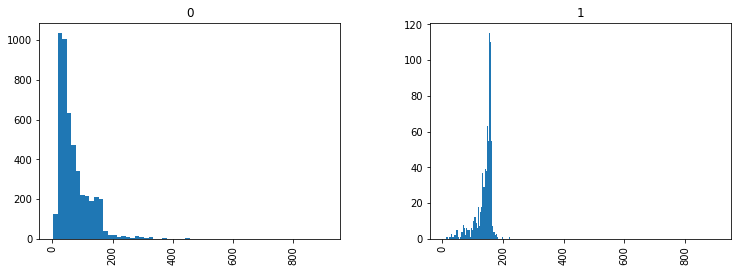

In [26]:
df.hist(column='length',by='spam',bins=60,figsize=(12,4));
plt.xlim(-40,950);

The spam messages are generally longer than ham messages:
Bulk of ham has length below 100, for spam it is above 100.

In [28]:
data_ham  = df[df['spam'] == 0].copy()
data_spam = df[df['spam'] == 1].copy()

In [33]:
import wordcloud

In [34]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['input Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

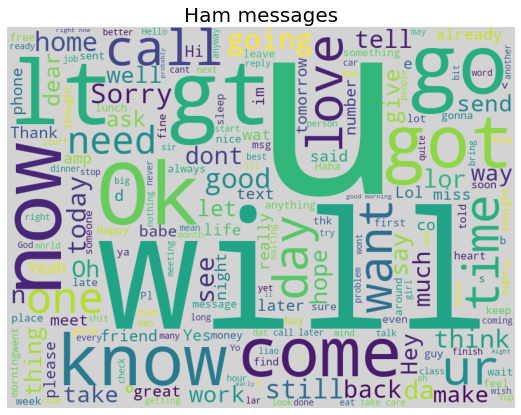

In [35]:
show_wordcloud(data_ham, "Ham messages")

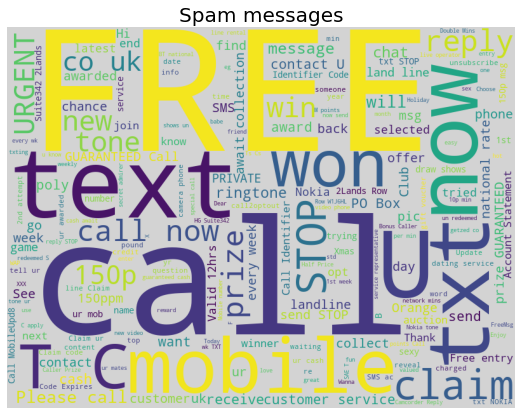

In [36]:
show_wordcloud(data_spam, "Spam messages")

So we can observe that Spam messages mostly contain words like FREE, text, call, won, prize, etc